<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Faculty           10000 non-null  object 
 1   Department        10000 non-null  object 
 2   UTME_Score        10000 non-null  int64  
 3   Screening_Score   10000 non-null  float64
 4   Olevel_Valid      10000 non-null  bool   
 5   Sittings          10000 non-null  int64  
 6   Admission_Status  10000 non-null  object 
 7   Olevel_Grades     10000 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 556.8+ KB


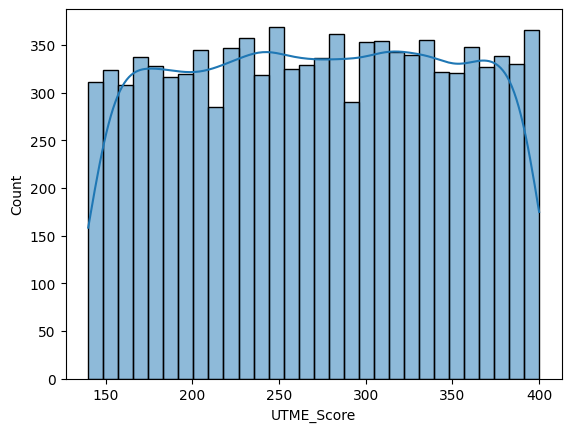

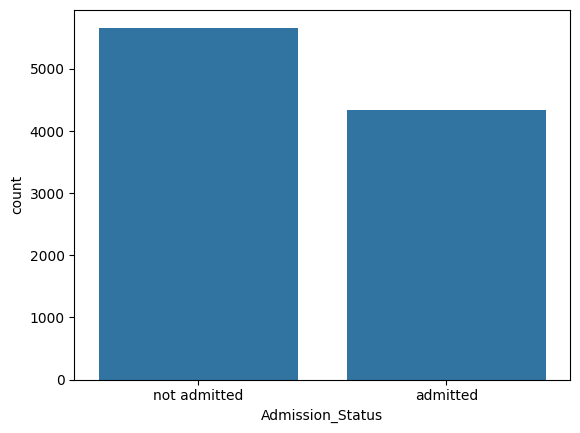

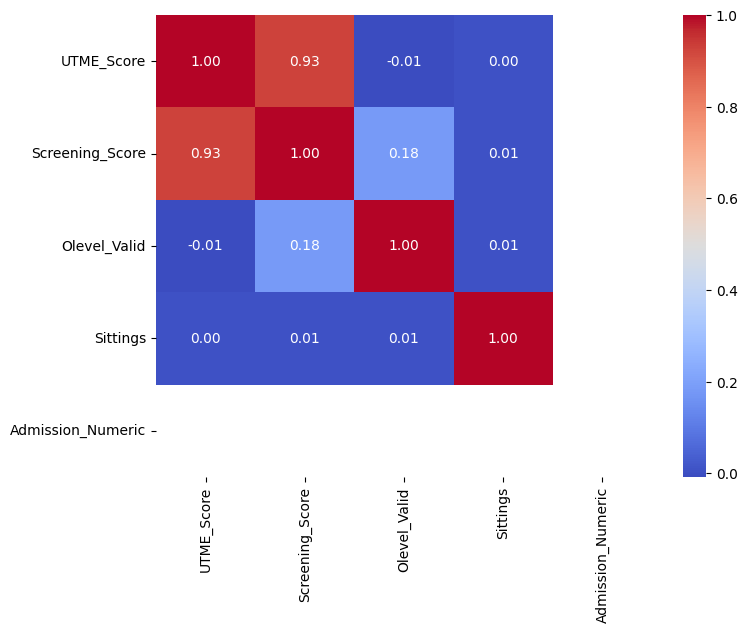

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

eksu_df = pd.read_csv("../../Data/EKSU.csv")

eksu_df.head()
eksu_df.info()
eksu_df.describe()
eksu_df.isnull().sum()
eksu_df.duplicated().sum()

sns.histplot(eksu_df['UTME_Score'], bins=30, kde=True)
plt.show()

sns.countplot(x="Admission_Status", data=eksu_df)
plt.show()

eksu_df.groupby("Faculty")['Admission_Status'].value_counts(normalize=True).unstack()

# Encode admitted column (Admitted=1, Rejected=0)
eksu_df['Admission_Numeric'] = eksu_df['Admission_Status'].map({"Admitted": 1, "Rejected": 0})

plt.figure(figsize=(8,6))
sns.heatmap(eksu_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()